# Метод гистограмм ориентированных градиентов (HOG)

HOG (Histogram of Oriented Gradients) - это метод компьютерного зрения, который используется для извлечения особых признаков из изображений. Он был предложен в 2005 году для задачи обнаружения объектов, особенно для обнаружения людей.

Основная идея метода HOG заключается в том, чтобы описать локальные градиенты яркости или направления краев в изображении. Для этого изображение разделяется на маленькие ячейки, и в каждой ячейке вычисляются градиенты яркости. Затем градиенты объединяются в гистограммы направлений, которые представляют распределение направлений градиентов в ячейке. Наконец, гистограммы объединяются в блоки, чтобы получить окончательное представление признаков.

Алгоритм HOG:

1. (необязательно) Глобальная нормализация изображения

2. Вычисление градиентного изображения по x и y

3. Вычисление градиентных гистограмм

4. Нормализация по блокам

5. Сведение в вектор признаков

На первом этапе применяется дополнительная глобальная корректировка нормализации изображения, предназначенная для уменьшения влияния эффектов освещения. 

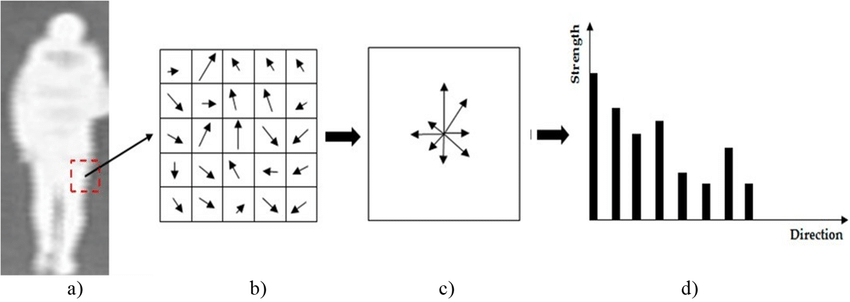

Демонстрация метода извлечения признаков HOG: а) входное изображение; б) карта градиента с силой градиента и направлением субблока входного изображения; в) ориентация накопленного градиента; г) гистограмма ориентированных градиентов

[Источник](https://www.researchgate.net/figure/A-demonstration-of-the-HOG-feature-extraction-method-a-the-input-image-b-gradient-map_fig2_352419028)



[Оригинальная статья, с описанием метода](https://ieeexplore.ieee.org/document/1467360)

Что такое "градиент изображения"?

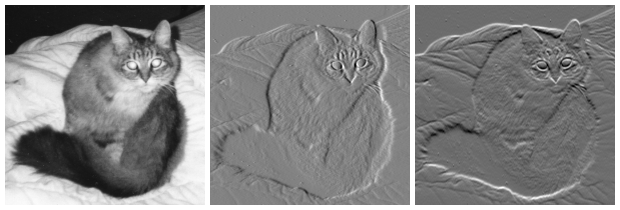

[Википедия](https://en.wikipedia.org/wiki/Image_gradient)

In [182]:
# установим необходимую библиотеку
%pip install scikit-image

In [183]:
import os
import numpy as np
import pandas as pd

from skimage.feature import hog
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [184]:
#Чтение файлов с данными
# Картинки на которых присутствует идентифицируемый объект (корова)

path = r"C:\Users\Анна\Desktop\ML занятия\HSE ML\HSE ML\DataSets\Images\Images\Cow"
cls1 = os.listdir(path)
n1 = len(cls1)
image1 = []

for i in range(n1):
    image = resize(imread(os.path.join(path, cls1[i])), (100, 100)) # для применения метода, приводим изображения к одному размеру
    image1.append(image)

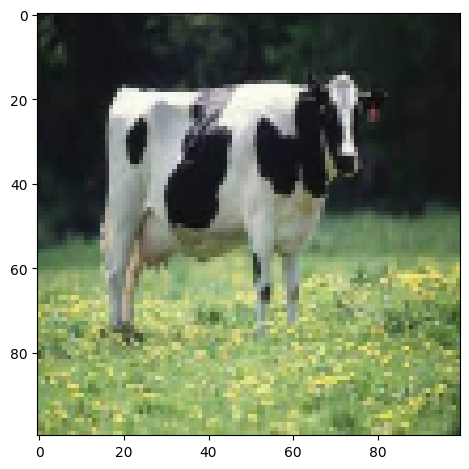

In [185]:
imshow(image1[0])

In [186]:
# Картинки на которых нет идентифицируемого объекта (пейзажи)

path = r"C:\Users\Анна\Desktop\ML занятия\HSE ML\HSE ML\DataSets\Images\Images\Landscape"
cls2 = os.listdir(path)
n2 = len(cls2)
image2 = []

for i in range(n2):
    image = resize(imread(os.path.join(path, cls2[i])), (100, 100))
    image2.append(image)

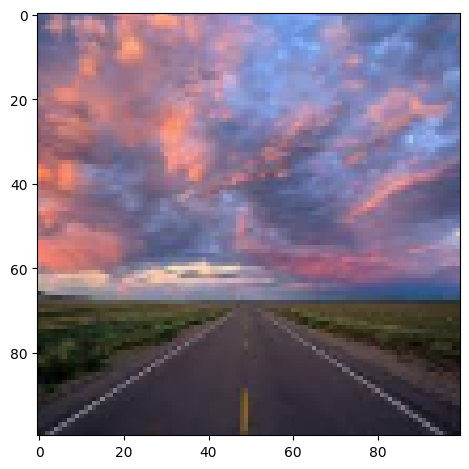

In [187]:
imshow(image2[0])

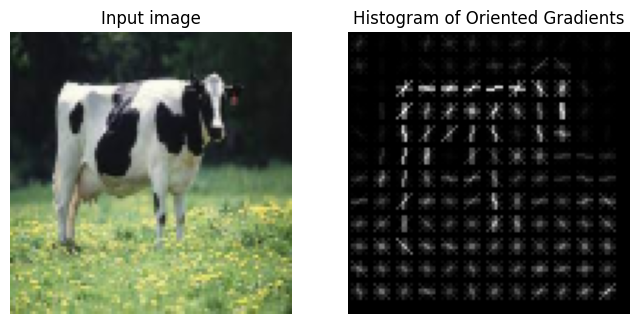

In [188]:
#Сначала давайте применим HOG алгоритм к одному изображению и посмотрим на результат

fd, hog_image = hog(image1[0], orientations=6, pixels_per_cell=(8, 8), cells_per_block=(3, 3),visualize=True,
                        channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image1[0], cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [189]:
# Применяем метод HOG (выделяем признаки)
hog_images1 = []
hog_features1 = []
#Получаем значения для HOG для обоих наборов данных и строим их
for img in image1:
    fd, hog_image = hog(img, orientations=6, pixels_per_cell=(8, 8), cells_per_block=(3, 3),visualize=True,
                        channel_axis=-1)
    hog_images1.append(hog_image)
    hog_features1.append(fd)

In [190]:
# Применяем метод HOG (выделяем признаки)
hog_images2 = []
hog_features2 = []
#Получаем значения для HOG для обоих наборов данных и строим их
for img in image2:
    fd, hog_image = hog(img, orientations=6, pixels_per_cell=(8, 8), cells_per_block=(3, 3),visualize=True,
                        channel_axis=-1)
    hog_images2.append(hog_image)
    hog_features2.append(fd)

In [191]:
# Превратим наши массивы в датафрейм и присвоим класс нашим картинкам
# 1 - корова, 0 - пейзаж
hog_features1 = np.vstack(hog_features1)
df1 = pd.DataFrame(hog_features1)
hog_features2 = np.vstack(hog_features2)
df2 = pd.DataFrame(hog_features2)
df1['Class'] = 1
df2['Class'] = 0
data = pd.concat([df1, df2], axis=0)
data = data.sample(frac=1).reset_index(drop=True) #перемешиваем данные

In [192]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,5391,5392,5393,5394,5395,5396,5397,5398,5399,Class
0,0.048365,0.110051,0.103903,0.123698,0.019668,0.007531,0.021875,0.042079,0.173628,0.137237,...,0.139774,0.097299,0.138749,0.098344,0.178141,0.207966,0.205672,0.098684,0.099484,1
1,0.008775,0.002807,0.009062,0.013306,0.001949,0.002524,0.052844,0.250946,0.022057,0.011795,...,0.032506,0.029692,0.197511,0.294023,0.074403,0.018796,0.089033,0.090292,0.125503,1
2,0.018901,0.032144,0.114859,0.060687,0.020468,0.021510,0.030323,0.032529,0.059019,0.034781,...,0.216040,0.112691,0.125806,0.165195,0.093206,0.110771,0.109259,0.022577,0.110982,0
3,0.108051,0.009050,0.052614,0.259721,0.213636,0.064173,0.020600,0.009774,0.010164,0.037998,...,0.136923,0.097058,0.088185,0.029753,0.124931,0.064522,0.169236,0.168740,0.067467,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [193]:
# разделим данные для обучения

X = data.drop(columns=['Class'])
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
# применим к данным 4 классификатора: kNN, SVM, дерево решений, и классификатор, основанные на нейросети
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
res_knn = knn_model.predict(X_test.values)

svm_model = SVC(probability=True, kernel="linear")
svm_model.fit(X_train, y_train)
res_svm = svm_model.predict(X_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
res_dt = dt_model.predict(X_test)

NN_model = MLPClassifier()
NN_model.fit(X_train, y_train)
res_NN = NN_model.predict(X_test)

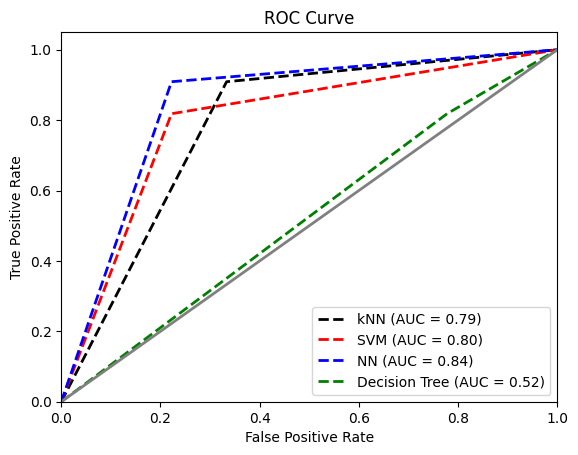

In [195]:
# Оценим качество работы классификаторов

# Вычисление ROC-кривых
fpr_knn, tpr_knn, _ = roc_curve(y_test, res_knn)
fpr_svm, tpr_svm, _ = roc_curve(y_test, res_svm)
fpr_nb, tpr_nb, _ = roc_curve(y_test, res_NN)
fpr_dt, tpr_dt, _ = roc_curve(y_test, res_dt)

# Рассчитать площадь под ROC-кривой (AUC-ROC)
auc_knn = roc_auc_score(y_test, res_knn)
auc_svm = roc_auc_score(y_test, res_svm)
auc_nb = roc_auc_score(y_test, res_NN)
auc_dt = roc_auc_score(y_test, res_dt)

# Визуализировать ROC-кривую
plt.plot(fpr_knn, tpr_knn, color='black', lw=2, linestyle='--', label=f'kNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, linestyle='--', label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, linestyle='--', label=f'NN (AUC = {auc_nb:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, linestyle='--', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [196]:
print('Результат kNN: \n', classification_report(y_test, res_knn))
print('Результат SVM: \n', classification_report(y_test, res_svm))
print('Результат Decision Tree: \n', classification_report(y_test, res_dt))
print('Результат Neural Network: \n', classification_report(y_test, res_NN))

Результат kNN: 
               precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.77      0.91      0.83        11

    accuracy                           0.80        20
   macro avg       0.81      0.79      0.79        20
weighted avg       0.81      0.80      0.80        20

Результат SVM: 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.82      0.82      0.82        11

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20

Результат Decision Tree: 
               precision    recall  f1-score   support

           0       0.50      0.22      0.31         9
           1       0.56      0.82      0.67        11

    accuracy                           0.55        20
   macro avg       0.53      0.52      0.49        20
weighted avg 